### Data 603 project

In [1]:
import import_ipynb

In [2]:
import HDFSLauncher

importing Jupyter notebook from HDFSLauncher.ipynb


In [3]:
hdfs=HDFSLauncher.get_hdfs()

In [ ]:
hdfs.mkdir("/data/projects/fall_2022/jbhatia1/flight_dataset")

In [7]:
with open('Combined_Flights_2022.csv','rb') as fid:
          hdfs.upload('/data/projects/fall_2022/jbhatia1/flight_dataset/Combined_Flights_2022.csv',fid)

In [4]:
hdfs.ls("/data/projects/fall_2022/jbhatia1/flight_dataset")

['/data/projects/fall_2022/jbhatia1/flight_dataset/Combined_Flights_2021.csv',
 '/data/projects/fall_2022/jbhatia1/flight_dataset/Combined_Flights_2022.csv']

In [5]:
import SparkLauncher

importing Jupyter notebook from SparkLauncher.ipynb


In [6]:
conf= SparkLauncher.get_spark_conf()

In [7]:
spark=SparkLauncher.get_spark_session(conf, pack_venv=False)

Creating Spark Session: jbhatia1_data603_spark_20221211_130405


In [8]:
spark

In [9]:
flight_2022 = spark.read.csv('/data/projects/fall_2022/jbhatia1/flight_dataset/Combined_Flights_2022.csv', header = True)

In [10]:
flight_2022.limit(5).toPandas()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [13]:
### Creating the parquet file

In [14]:
flight_2022.write.parquet('/etl/projects/fall_2022/jbhatia1/flight_dataset')

In [17]:
hdfs.ls('/etl/projects/fall_2022/jbhatia1/flight_dataset',detail=True)[1]

{'kind': 'file',
 'name': '/etl/projects/fall_2022/jbhatia1/flight_dataset/part-00000-582a4e13-bd39-4762-bbb0-df1c21fcecc6-c000.snappy.parquet',
 'owner': 'jbhatia1',
 'group': 'hadoop',
 'last_modified_time': 1670784252,
 'last_access_time': 1670784241,
 'size': 10942454,
 'replication': 3,
 'block_size': 268435456,
 'permissions': 420}

In [21]:
#  Reading parquet file

In [23]:
flight_2022_df_from_parquet = spark.read.parquet('/etl/projects/fall_2022/jbhatia1/flight_dataset')

In [25]:
# Verifying parquet file

In [26]:
flight_2022_df_from_parquet

DataFrame[FlightDate: string, Airline: string, Origin: string, Dest: string, Cancelled: string, Diverted: string, CRSDepTime: string, DepTime: string, DepDelayMinutes: string, DepDelay: string, ArrTime: string, ArrDelayMinutes: string, AirTime: string, CRSElapsedTime: string, ActualElapsedTime: string, Distance: string, Year: string, Quarter: string, Month: string, DayofMonth: string, DayOfWeek: string, Marketing_Airline_Network: string, Operated_or_Branded_Code_Share_Partners: string, DOT_ID_Marketing_Airline: string, IATA_Code_Marketing_Airline: string, Flight_Number_Marketing_Airline: string, Operating_Airline: string, DOT_ID_Operating_Airline: string, IATA_Code_Operating_Airline: string, Tail_Number: string, Flight_Number_Operating_Airline: string, OriginAirportID: string, OriginAirportSeqID: string, OriginCityMarketID: string, OriginCityName: string, OriginState: string, OriginStateFips: string, OriginStateName: string, OriginWac: string, DestAirportID: string, DestAirportSeqID: s

In [29]:
flight_2022_df_from_parquet.limit(5).toPandas()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-19,Envoy Air,LEX,DFW,False,False,800,756.0,0.0,-4.0,...,808.0,901.0,13.0,931,-17.0,0.0,-2.0,0900-0959,4,0
1,2022-04-20,Envoy Air,LEX,DFW,False,False,800,753.0,0.0,-7.0,...,804.0,927.0,15.0,931,11.0,0.0,0.0,0900-0959,4,0
2,2022-04-21,Envoy Air,LEX,DFW,False,False,800,758.0,0.0,-2.0,...,828.0,933.0,13.0,931,15.0,1.0,1.0,0900-0959,4,0
3,2022-04-22,Envoy Air,LEX,DFW,False,False,800,757.0,0.0,-3.0,...,812.0,909.0,15.0,931,-7.0,0.0,-1.0,0900-0959,4,0
4,2022-04-23,Envoy Air,LEX,DFW,False,False,800,758.0,0.0,-2.0,...,815.0,915.0,21.0,931,5.0,0.0,0.0,0900-0959,4,0


In [40]:
# EDA

In [42]:
# creating a temp table of the dataframe

flight_2022.createOrReplaceTempView('flight_2022_t')

In [52]:
cnt=spark.sql("select Cancelled, count(Cancelled) as count from flight_2022_t group by Cancelled")

In [53]:
cnt.show()

+---------+-------+
|Cancelled|  count|
+---------+-------+
|    False|3955126|
|     True| 123192|
+---------+-------+



In [67]:
# Calculating null values

nv=spark.sql(" select * from flight_2022_t where FlightDate is not null")

In [68]:
nv.count()

4078318

In [69]:
a=spark.sql(" select * from flight_2022_t")

In [70]:
a.count()

4078318

In [71]:
# This shows that there are no null values in FlightDate column

In [88]:
# Number of flights landing in Maryland state

mf= spark.sql(" select * from flight_2022_t where DestStateName='Maryland' ")

In [89]:
mf.count()

49533

In [90]:
# Number of flights landing in Maryland state that got cancelled

mfc= spark.sql(" select * from flight_2022_t where DestStateName='Maryland' and Cancelled = True ")

In [91]:
mfc.count()

1826

In [94]:
mfc.toPandas()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-01,Southwest Airlines Co.,ALB,BWI,True,False,1435,None,None,None,...,None,None,None,1550,None,None,None,1500-1559,2,0
1,2022-04-01,Southwest Airlines Co.,BUF,BWI,True,False,535,None,None,None,...,None,None,None,650,None,None,None,0600-0659,2,0
2,2022-04-01,Southwest Airlines Co.,BUF,BWI,True,False,1345,None,None,None,...,None,None,None,1450,None,None,None,1400-1459,2,0
3,2022-04-01,Southwest Airlines Co.,CVG,BWI,True,False,530,None,None,None,...,None,None,None,700,None,None,None,0700-0759,2,0
4,2022-04-01,Southwest Airlines Co.,DTW,BWI,True,False,530,None,None,None,...,None,None,None,705,None,None,None,0700-0759,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-03-18,Southwest Airlines Co.,LGA,BWI,True,False,600,None,None,None,...,None,None,None,715,None,None,None,0700-0759,1,0
1822,2022-03-18,Southwest Airlines Co.,MIA,BWI,True,False,1640,None,None,None,...,None,None,None,1910,None,None,None,1900-1959,4,0
1823,2022-03-19,Southwest Airlines Co.,FLL,BWI,True,False,1140,None,None,None,...,None,None,None,1415,None,None,None,1400-1459,4,0
1824,2022-03-31,Republic Airlines,JFK,BWI,True,False,2155,None,None,None,...,None,None,None,2308,None,None,None,2300-2359,1,0


In [179]:
# Airlines that were cancelled the most for Maryland

cm=spark.sql(" select Airline,count(Airline) as cnt from flight_2022_t where DestStateName='Maryland' and Cancelled = True group by Airline order by cnt DESC")

In [180]:
cm.show()

+--------------------+----+
|             Airline| cnt|
+--------------------+----+
|Southwest Airline...|1342|
|    Spirit Air Lines|  97|
|American Airlines...|  94|
|Delta Air Lines Inc.|  82|
|   Endeavor Air Inc.|  43|
|Frontier Airlines...|  33|
|   Republic Airlines|  32|
|United Air Lines ...|  27|
|Alaska Airlines Inc.|  24|
|Capital Cargo Int...|  17|
|       Allegiant Air|  16|
|         Comair Inc.|   8|
|SkyWest Airlines ...|   6|
|  Mesa Airlines Inc.|   3|
|           Envoy Air|   2|
+--------------------+----+



In [181]:
cm=cm.toPandas()

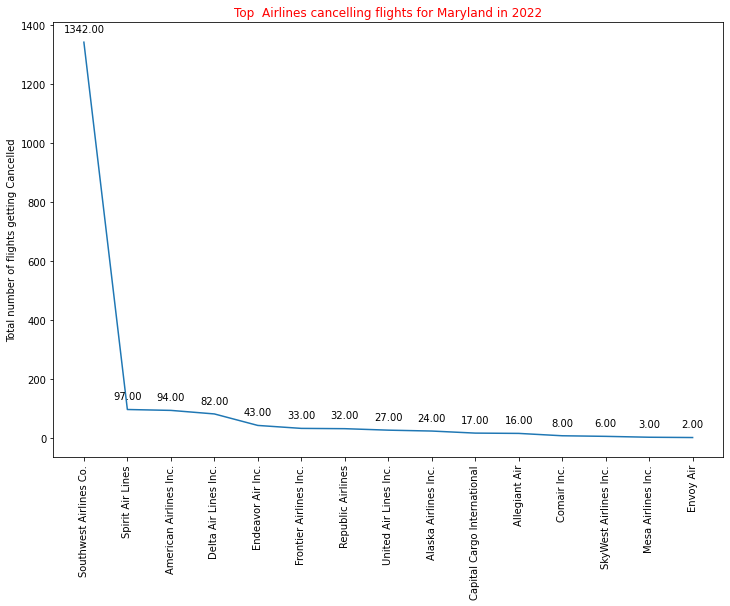

In [184]:
plt.figure(figsize=(12,8))
plt.plot(cm.Airline,cm.cnt)
plt.xticks(rotation=90)
plt.ylabel("Total number of flights getting Cancelled")
for x,y in zip(cm.Airline,cm.cnt):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title("Top  Airlines cancelling flights for Maryland in 2022",color="Red")
plt.show()

In [ ]:
# Thus we know which flights should one book at the time for travelling.

In [161]:
# Count of specific airlines

ac=spark.sql("Select Airline,count(Airline) as cnt from flight_2022_t group by Airline order by cnt DESC limit 10")

In [162]:
ac.show()

+--------------------+------+
|             Airline|   cnt|
+--------------------+------+
|Southwest Airline...|731925|
|Delta Air Lines Inc.|512114|
|American Airlines...|495953|
|SkyWest Airlines ...|440807|
|United Air Lines ...|352009|
|   Republic Airlines|197881|
|     JetBlue Airways|156793|
|           Envoy Air|150758|
|   Endeavor Air Inc.|142624|
|         Comair Inc.|135884|
+--------------------+------+



In [163]:
ac=ac.toPandas()

In [164]:
ac

,Airline,cnt
0,Southwest Airlines Co.,731925
1,Delta Air Lines Inc.,512114
2,American Airlines Inc.,495953
3,SkyWest Airlines Inc.,440807
4,United Air Lines Inc.,352009
5,Republic Airlines,197881
6,JetBlue Airways,156793
7,Envoy Air,150758
8,Endeavor Air Inc.,142624
9,Comair Inc.,135884


In [165]:
import matplotlib.pyplot as plt

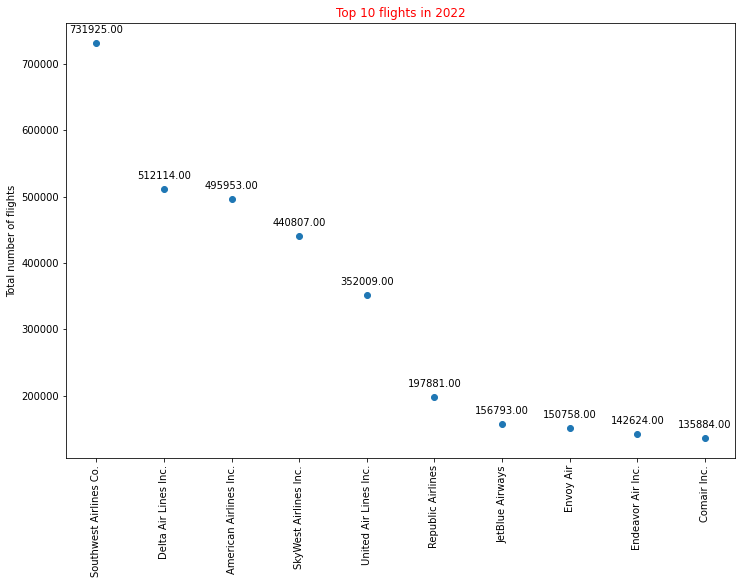

In [259]:
plt.figure(figsize=(12,8))
plt.scatter(ac.Airline,ac.cnt)
plt.xticks(rotation=90)
plt.ylabel("Total number of flights")
for x,y in zip(ac.Airline,ac.cnt):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title("Top 10 flights in 2022",color="Red")
plt.show()

In [248]:
# Airlines that were Diverted the most 

cm=spark.sql(" select Airline,count(Airline) as cnt from flight_2022_t where Diverted = True group by Airline order by cnt DESC")

In [249]:
cm=cm.toPandas()

In [250]:
cm

,Airline,cnt
0,Southwest Airlines Co.,1515
1,American Airlines Inc.,1346
2,SkyWest Airlines Inc.,1209
3,Delta Air Lines Inc.,1063
4,United Air Lines Inc.,1006
5,JetBlue Airways,635
6,Republic Airlines,603
7,Comair Inc.,398
8,Envoy Air,371
9,Alaska Airlines Inc.,353


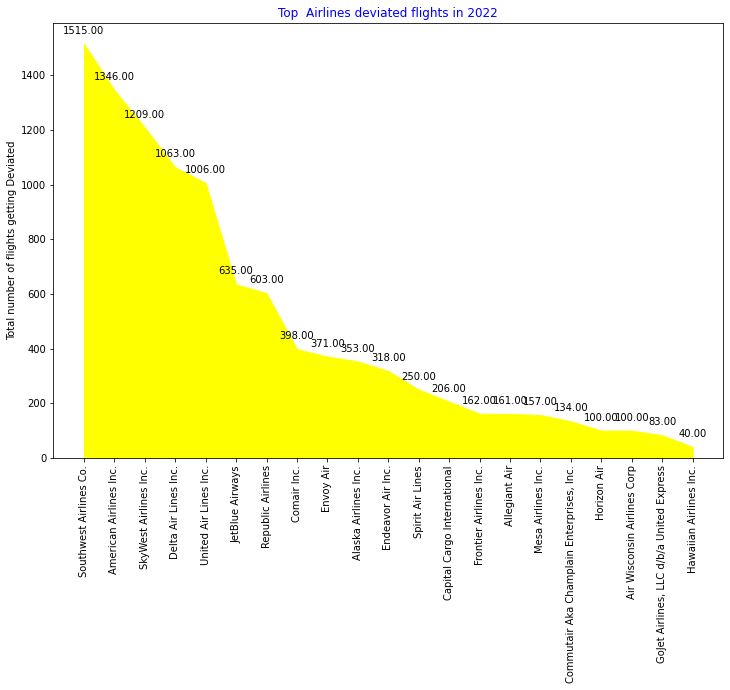

In [263]:
plt.figure(figsize=(12,8))
plt.stackplot(cm.Airline,cm.cnt,color=["yellow"])
plt.xticks(rotation=90)
plt.ylabel("Total number of flights getting Deviated")
for x,y in zip(cm.Airline,cm.cnt):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title("Top  Airlines deviated flights in 2022",color="Blue")
plt.show()

In [202]:
# The most famous cities that people prefer to travel in 2022

cm=spark.sql(" select DestCityName,count(DestCityName) as cnt from flight_2022_t group by DestCityName order by cnt DESC limit 5")

In [203]:
cm.show()

+--------------------+------+
|        DestCityName|   cnt|
+--------------------+------+
|         Chicago, IL|213516|
|         Atlanta, GA|183671|
|        New York, NY|179370|
|Dallas/Fort Worth...|161215|
|          Denver, CO|158095|
+--------------------+------+



In [204]:
cm=cm.toPandas()

In [205]:
cm

,DestCityName,cnt
0,"Chicago, IL",213516
1,"Atlanta, GA",183671
2,"New York, NY",179370
3,"Dallas/Fort Worth, TX",161215
4,"Denver, CO",158095


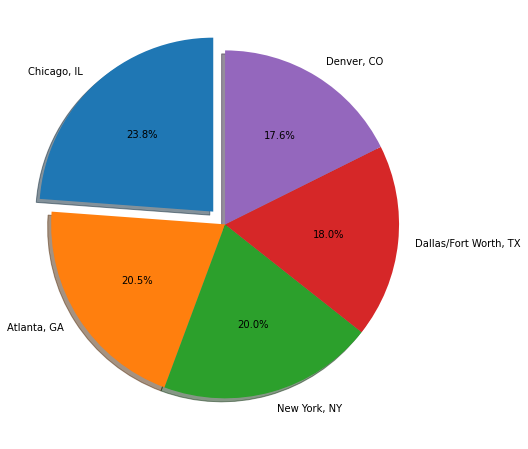

In [212]:
plt.figure(figsize=(12,8))
plt.pie(cm.cnt,explode=[0.1,0,0,0,0],labels=cm.DestCityName,autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

In [265]:
# Since my dream state is California i want to now the flights that connect between California and Maryland 

cm=spark.sql("select Airline, count(Airline) as cnt, OriginStateName, DestStateName from flight_2022_t where OriginStateName='Maryland' and DestStateName='California' group by Airline, OriginStateName, DestStateName order by cnt DESC")

In [266]:
cm.show()

+--------------------+---+---------------+-------------+
|             Airline|cnt|OriginStateName|DestStateName|
+--------------------+---+---------------+-------------+
|Southwest Airline...|452|       Maryland|   California|
|United Air Lines ...|340|       Maryland|   California|
|    Spirit Air Lines|192|       Maryland|   California|
+--------------------+---+---------------+-------------+



In [267]:
cm=cm.toPandas()

In [268]:
cm

,Airline,cnt,OriginStateName,DestStateName
0,Southwest Airlines Co.,452,Maryland,California
1,United Air Lines Inc.,340,Maryland,California
2,Spirit Air Lines,192,Maryland,California


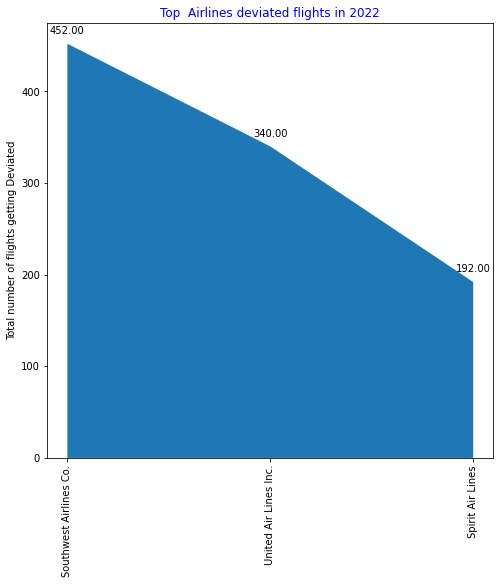

In [269]:
plt.figure(figsize=(8,8))
plt.stackplot(cm.Airline,cm.cnt)
plt.xticks(rotation=90)
plt.ylabel("Total number of flights getting Deviated")
for x,y in zip(cm.Airline,cm.cnt):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title("Top  Airlines deviated flights in 2022",color="Blue")
plt.show()